In [1]:
import os
import json
from datetime import datetime 
import matplotlib.pylab as plt
from operator import add, truediv

In [2]:
import pandas as pd

In [23]:
def latency(uuid):
    start_time = 1611059608855
    with open(uuid) as f:
        node = json.load(f)
        for peer in node:
            arr = []
            if len(node[peer]) == 0:
                continue
#             print(node[peer][0]['from'])
            fromNode = node[peer][0]['from'][:-37]
            toNode = node[peer][0]['to'][:-37]
            if node[peer][0]['to'] != peer:
                continue
            i = -1
            for obj in node[peer]:
                i = i + 1
                if i % 2 != 0:
                    continue
                if 'Video' in obj:
                    time = int((obj['Video']['timestamp']-1611073100000)/1000)
                    time = int(5 * round(time/5))
                    if time < 0:
                        continue
                    if time > 250:
                        break
                    arr.append({'Timestamp' : time, 'RTT' : obj['Video']['roundTripTime']})
            df = pd.DataFrame(arr)
            if 'Timestamp' not in df or df['Timestamp'][0] != 0:
                print(fromNode + '-' + toNode)
                continue
            df.to_csv('latency-csv/'+fromNode+'-'+toNode+'.csv')
#             print(df)

In [24]:
arr = os.listdir()
for filewa in arr:
    if filewa[-4:] != 'json':
        continue
    print("Node : ", filewa[5:-54], '\n')
    latency(filewa)
#     print()

Node :  Harshit 

Node :  Anshu 

Node :  Sharisth 

Node :  Ashmesh 

Node :  Parth 

Node :  Jysamrani 

Node :  Anees 

Node :  Sumit 

Node :  Chaitnya 

Node :  Himanshu 

Node :  Shivank 

Node :  Jaysoni 

Node :  Rishitha 

Node :  Shreyas 

Node :  Niket 

Node :  Mohit 

Node :  Yedla 

Node :  Basant 

Node :  Yash 

Node :  Vanisha 

Node :  Satvik 

Node :  Shwetha 

Node :  Shivam 

Node :  Unique 

Node :  Sankalp 

Node :  NIshant 

Node :  Lohit 

Node :  Prthamesh 

Node :  Ayush 

Node :  Chinmay 

Node :  Siddharth 

Node :  Prakhar 

Node :  Moka 

Node :  Shubham 

Node :  Vidhi 

Node :  Aditya 

Node :  Pravin 

Node :  Nidhi 

Node :  Ruchika 

Ruchika-Vaishnavi
Node :  Shashwat 

Node :  Arnav 

Node :  Arshpreet 

Node :  Sarthak 

Node :  ChinmaySahoo 

Node :  Raghvendra 

Node :  Vijay 

Node :  Mansi 

Node :  Tishang 

Node :  Aditi 

Node :  Avatansh 

Node :  Amar 

Node :  Prabhadh 

Node :  Prashant_OnBehalf 

Node :  Srindhi 

Node :  Ansh 



Ashmesh-Basant


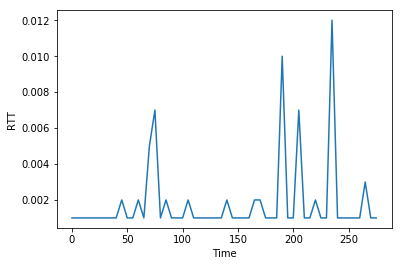

Ansh-Shivank


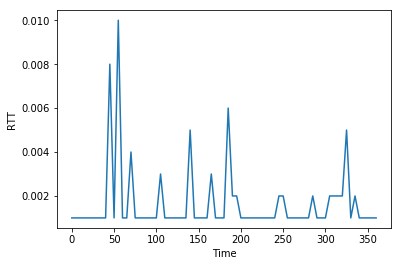

Unique-Pravin


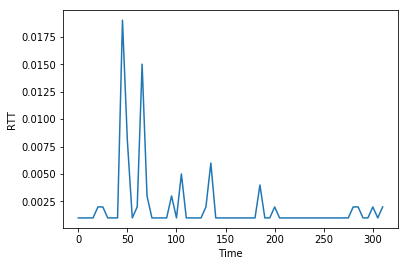

Ashmesh-NIshant


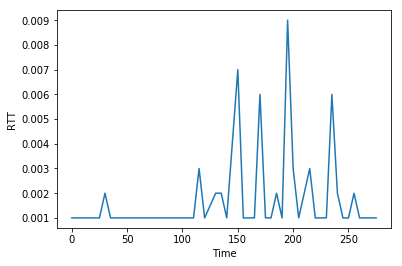

Ayush-Shashwat


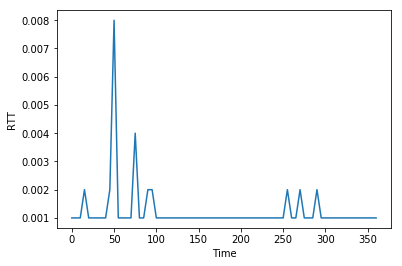

Shivam-Sarthak


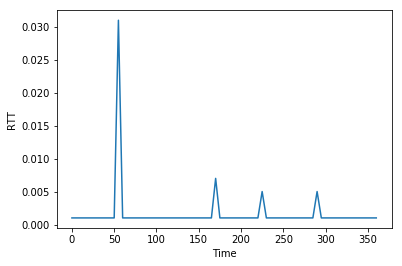

Ayush-Harshit


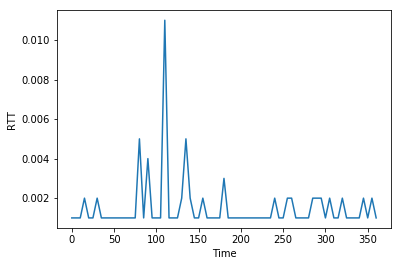

ChinmaySahoo-Sumit


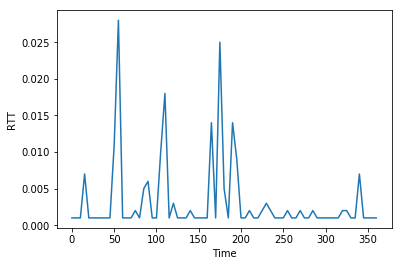

Parth-Anshu


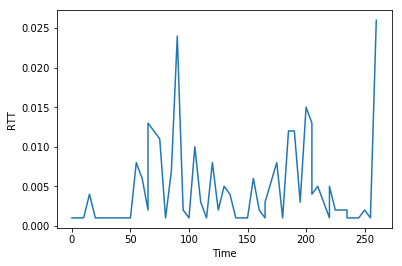

Ansh-Siddharth


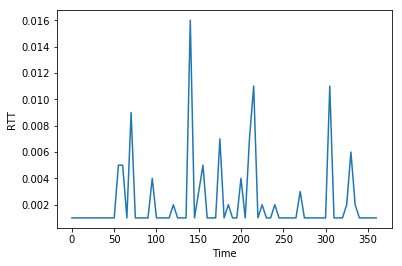

ChinmaySahoo-Arshpreet


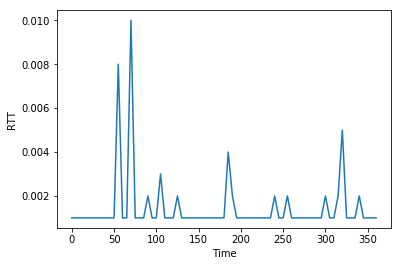

Jysamrani-Yash


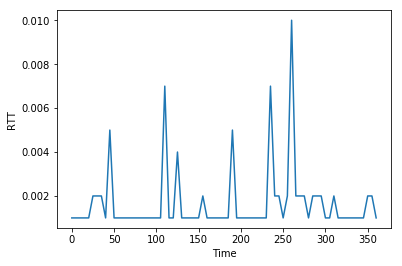

Sankalp-Niket


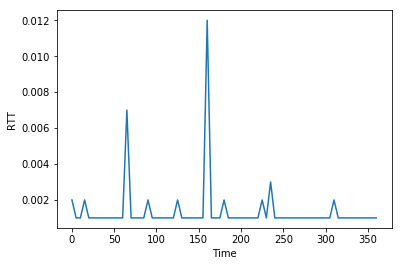

Jysamrani-Tishang


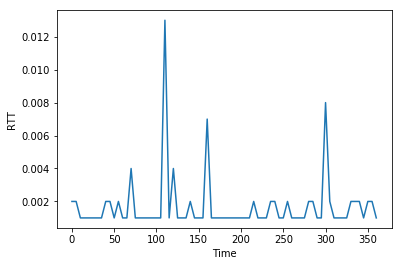

Parth-Shivam


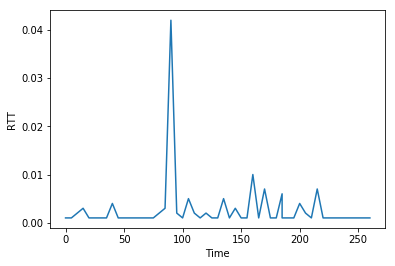

Ashmesh-Mohit


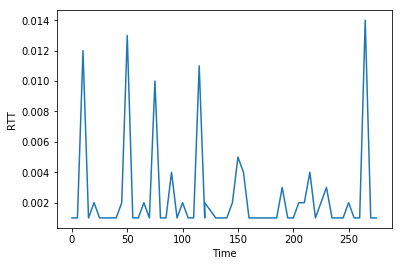

Shivam-Jaysoni


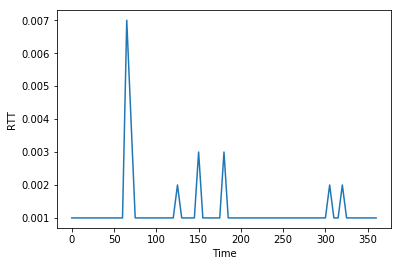

Ayush-Raghvendra


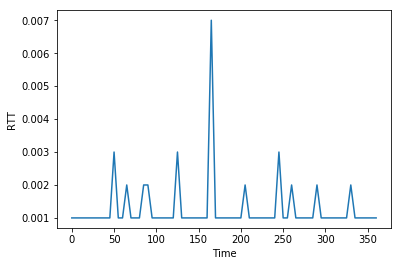

Sankalp-Vijay


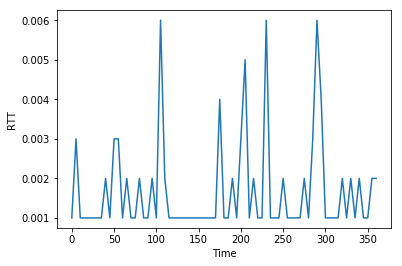

Ansh-Avatansh


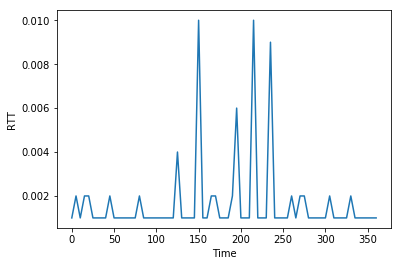

Shivam-Nidhi


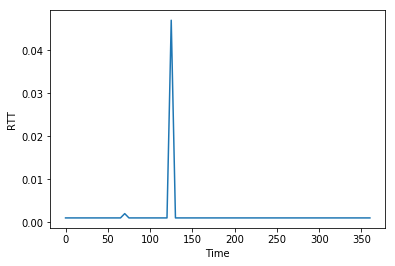

Prabhadh-Aditya


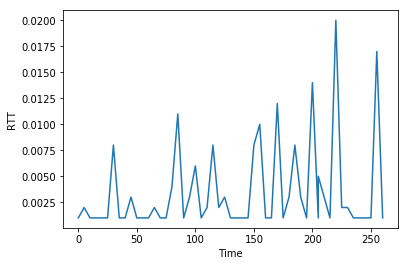

Ayush-Himanshu


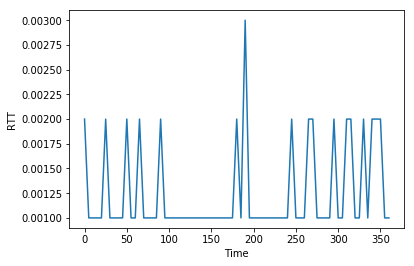

Ruchika-Satvik


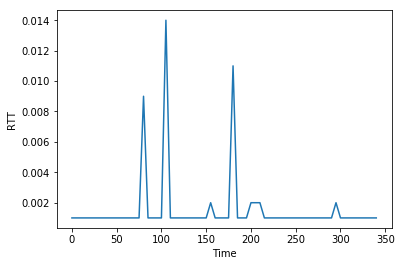

Ruchika-Prashant_OnBehalf


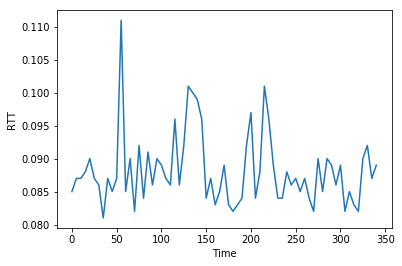

Ruchika-Vanisha


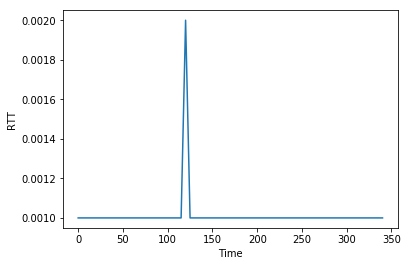

Jysamrani-Shubham


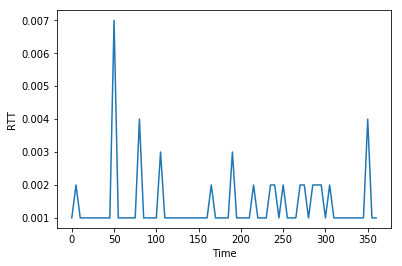

Jysamrani-Shwetha


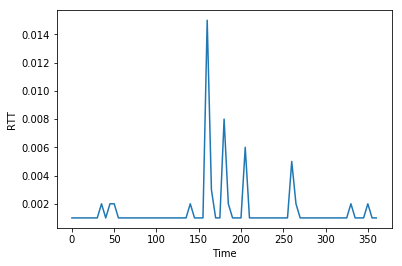

Prabhadh-Prakhar


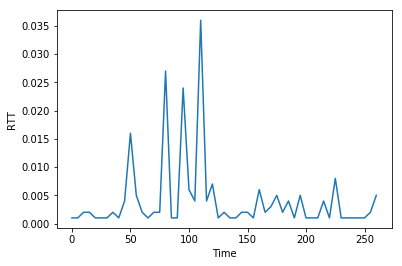

Anshu-Shreyas


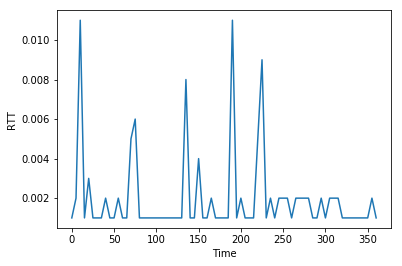

Shivam-Vidhi


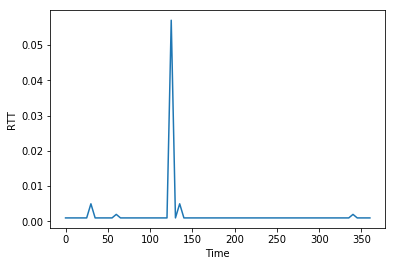

Unique-Arnav


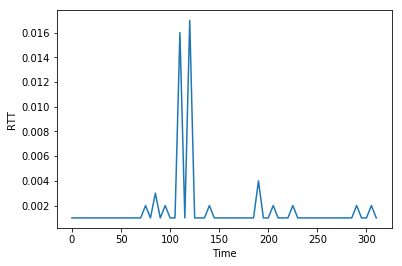

Unique-Anees


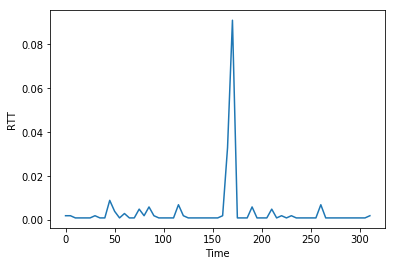

Ansh-Lohit


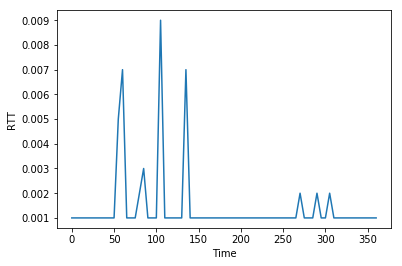

Chinmay-ChinmaySahoo


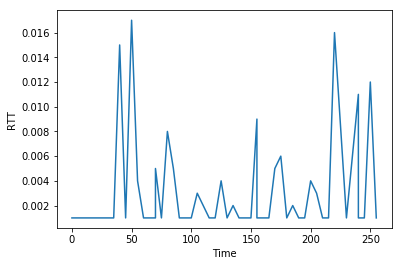

Sankalp-Mansi


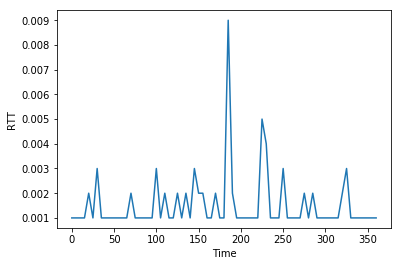

Anshu-Prthamesh


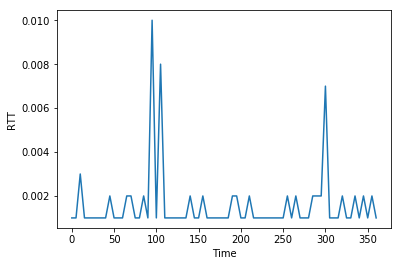

ChinmaySahoo-Srindhi


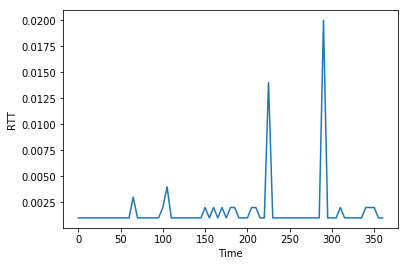

Ashmesh-Amar


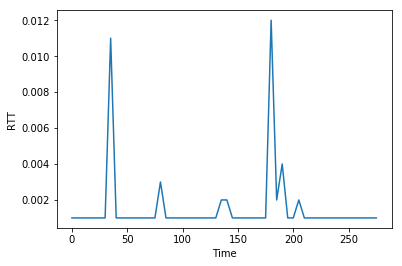

Chinmay-Unique


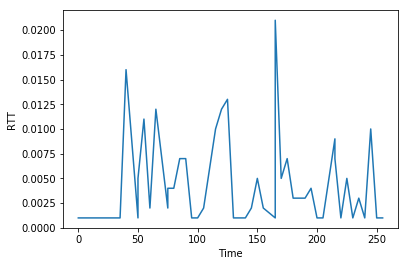

Chinmay-Ayush


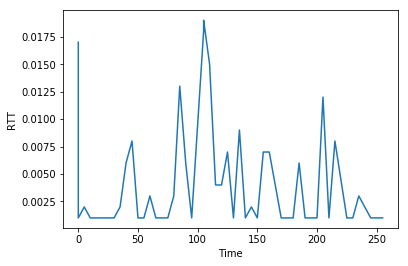

Unique-Moka


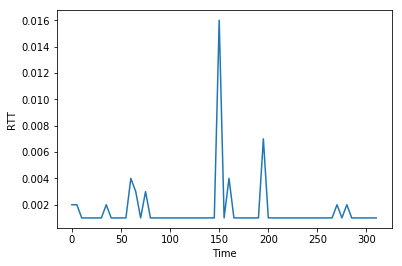

Prabhadh-Ruchika


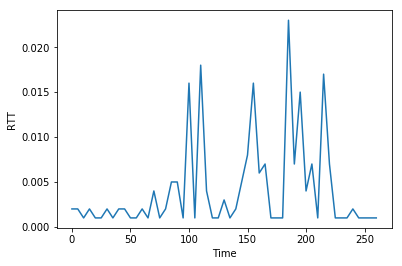

Anshu-Sharisth


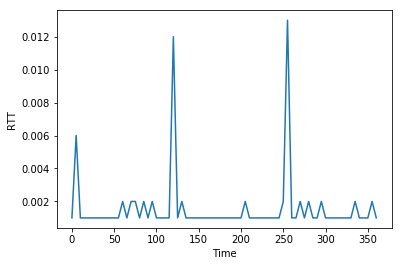

Anshu-Yedla


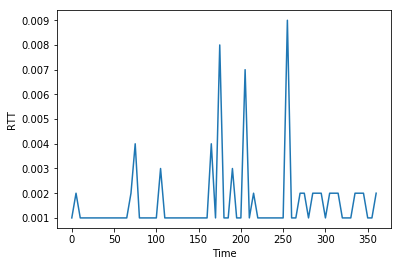

Parth-Sankalp


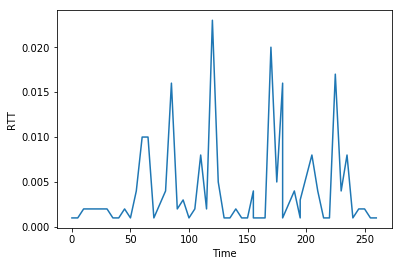

Prabhadh-Aditi


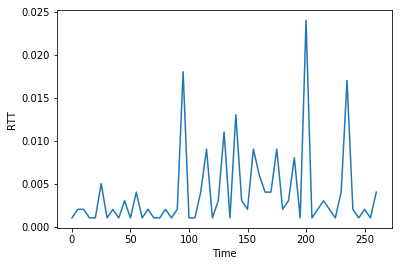

Parth-Jysamrani


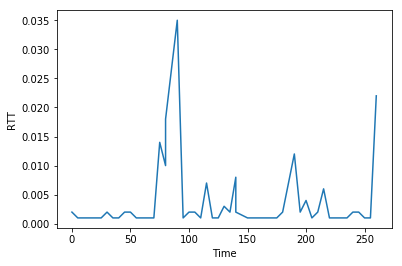

Sankalp-Rishitha


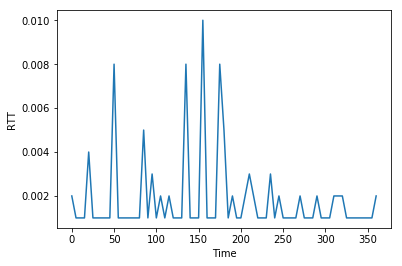

ChinmaySahoo-Chaitnya


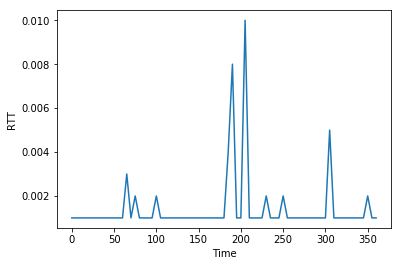

Chinmay-Ansh


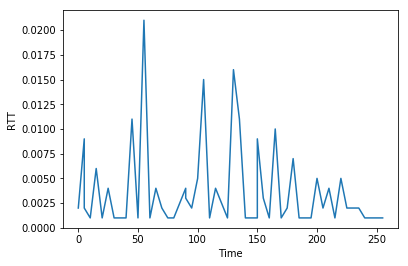

In [21]:
csv_files = os.listdir('latency-csv/')
for file in csv_files:
    if file[-3:] != 'csv':
        continue
    print(file[:-4])
    df = pd.read_csv("latency-csv/"+file)
    if 'Timestamp' not in df:
        print('Dataframe erroneous')
        continue
    time = df['Timestamp']
    rtt = df['RTT']
    plt.plot(time,rtt)
    plt.xlabel('Time')
    plt.ylabel('RTT')
    plt.show()

In [ ]:
def isPresent(file, node):
    

In [28]:
def recurse(node, rtt=[0]*51):
#     print(node)
    csv_files = os.listdir('latency-csv/')
    for file in csv_files:
        if file.find(node) == 0:
            df = pd.read_csv('latency-csv/'+file)
#             if ts > len(df['RTT']):
#                 continue
            df['New-RTT'] = df['RTT'] + rtt
            df['Old-RTT'] = rtt
            df.to_csv('latency-csv/'+file)
            recurse(file[file.find('-')+1:-4], df['New-RTT'])

In [27]:
csv_files = os.listdir('latency-csv/')
for file in csv_files:
    df = pd.read_csv('latency-csv/'+file)
    if 'RTT' not in df:
        continue
#     if len(df['RTT']) > 51:
#         df.drop(df.tail(1).index,inplace=True)
#         df.to_csv('latency-csv/'+file)
#     print(file)
    print(len(df['RTT']))

51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51


In [29]:
root1 = 'Prabadh'
root2 = 'Parth'
root3 = 'Ashmesh'
root4 = 'Chinmay'
# print(root2)
recurse(root1)
recurse(root2)
recurse(root3)
recurse(root4)

In [30]:
csv_files = os.listdir('latency-csv/')
for file in csv_files:
    df = pd.read_csv('latency-csv/'+file)
    print(file)
    print(df.head(5))

Ashmesh-Basant.csv
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.001        0
1           1             1  0.001          5    0.001        0
2           2             2  0.001         10    0.001        0
3           3             3  0.001         15    0.001        0
4           4             4  0.001         20    0.001        0
Ansh-Shivank.csv
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.003    0.002
1           1             1  0.001          5    0.010    0.009
2           2             2  0.001         10    0.003    0.002
3           3             3  0.001         15    0.002    0.001
4           4             4  0.001         20    0.007    0.006
Unique-Pravin.csv
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.002    0.001
1           1             1  0.001          5    0

   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.002    0.001
1           1             1  0.001          5    0.002    0.001
2           2             2  0.001         10    0.002    0.001
3           3             3  0.001         15    0.004    0.003
4           4             4  0.001         20    0.002    0.001
Prabhadh-Aditya.csv
   Unnamed: 0    RTT  Timestamp
0           0  0.001          0
1           1  0.002          5
2           2  0.001         10
3           3  0.001         15
4           4  0.001         20
Ayush-Himanshu.csv
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.002          0    0.019    0.017
1           1             1  0.001          5    0.002    0.001
2           2             2  0.001         10    0.003    0.002
3           3             3  0.001         15    0.002    0.001
4           4             4  0.001         20    0.002    0.001
R

Anshu-Yedla.csv
   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    RTT  Timestamp  New-RTT  \
0           0             0               0  0.001          0    0.003   
1           1             1               1  0.002          5    0.011   
2           2             2               2  0.001         10    0.003   
3           3             3               3  0.001         15    0.002   
4           4             4               4  0.001         20    0.007   

   Old-RTT  
0    0.002  
1    0.009  
2    0.002  
3    0.001  
4    0.006  
Parth-Sankalp.csv
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.001        0
1           1             1  0.001          5    0.001        0
2           2             2  0.002         10    0.002        0
3           3             3  0.002         15    0.002        0
4           4             4  0.002         20    0.002        0
Prabhadh-Aditi.csv
   Unnamed: 0    RTT  Timestamp
0       

In [31]:
df = pd.read_csv('latency-csv/Parth-Sankalp.csv')
print(df.head())
df = pd.read_csv('latency-csv/Sankalp-Mansi.csv')
print(df.head())
# df = pd.read_csv('latency-csv/Unique-Anees.csv')
# print(df.head())
# df = pd.read_csv('latency-csv/Anees-Vaishnavi.csv')
# print(df.head())

   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.001        0
1           1             1  0.001          5    0.001        0
2           2             2  0.002         10    0.002        0
3           3             3  0.002         15    0.002        0
4           4             4  0.002         20    0.002        0
   Unnamed: 0  Unnamed: 0.1    RTT  Timestamp  New-RTT  Old-RTT
0           0             0  0.001          0    0.002    0.001
1           1             1  0.001          5    0.002    0.001
2           2             2  0.001         10    0.003    0.002
3           3             3  0.001         15    0.003    0.002
4           4             4  0.002         20    0.004    0.002


In [32]:
def findLeaf(node):
    flag = False
    csv_files = os.listdir('latency-csv/')
    for file in csv_files:
        if file.find(node) == 0:
            flag = True
            findLeaf(file[file.find('-')+1:-4])
    if flag == False:
        leaf_arr.append(node)

In [33]:
leaf_arr = []
findLeaf('Prabadh')
findLeaf('Parth')
findLeaf('Ashmesh')
findLeaf('Chinmay')
leaf_arr

['Prabadh',
 'Shreyas',
 'Prthamesh',
 'Sharisth',
 'Yedla',
 'Sarthak',
 'Jaysoni',
 'Nidhi',
 'Vidhi',
 'Niket',
 'Vijay',
 'Mansi',
 'Rishitha',
 'Yash',
 'Tishang',
 'Shubham',
 'Shwetha',
 'Basant',
 'NIshant',
 'Mohit',
 'Amar',
 'Sumit',
 'Arshpreet',
 'Sumit',
 'Arshpreet',
 'Srindhi',
 'Chaitnya',
 'Srindhi',
 'Pravin',
 'Arnav',
 'Anees',
 'Moka',
 'Shashwat',
 'Harshit',
 'Raghvendra',
 'Himanshu',
 'Chaitnya',
 'Shivank',
 'Siddharth',
 'Avatansh',
 'Shreyas',
 'Lohit',
 'Prthamesh',
 'Sharisth',
 'Yedla']

In [34]:
len(leaf_arr)

45

In [35]:
df1 = pd.DataFrame()
df1['Latency'] = [0] * 51
df1['Time'] = [0] * 51
csv_files = os.listdir('latency-csv/')
for file in csv_files:
    if file[file.find('-')+1:-4] in leaf_arr:
        df = pd.read_csv('latency-csv/'+file)
        df1['Latency'] = (df1['Latency'] + df['New-RTT'])/2
        df1['Time'] = df['Timestamp']
df1.to_csv('latency-csv/latency.csv')

    Unnamed: 0   Latency  Time
0            0  0.001951     0
1            1  0.003485     5
2            2  0.001929    10
3            3  0.001729    15
4            4  0.003443    20
5            5  0.001729    25
6            6  0.002311    30
7            7  0.001664    35
8            8  0.001477    40
9            9  0.002216    45
10          10  0.005153    50
11          11  0.002364    55
12          12  0.008076    60
13          13  0.004858    65
14          14  0.002599    70
15          15  0.002704    75
16          16  0.002362    80
17          17  0.006424    85
18          18  0.002505    90
19          19  0.003155    95
20          20  0.002181   100
21          21  0.003058   105
22          22  0.005972   110
23          23  0.002142   115
24          24  0.008577   120
25          25  0.002845   125
26          26  0.001923   130
27          27  0.006138   135
28          28  0.003673   140
29          29  0.001481   145
30          30  0.001987   150
31      

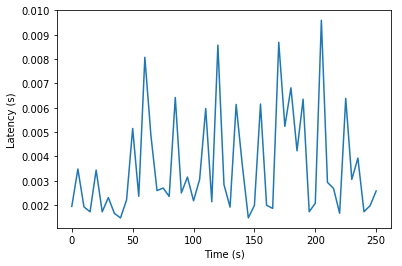

In [36]:
df = pd.read_csv('latency-csv/latency.csv')
print(df)
time = df['Time']
latency = df['Latency']
plt.plot(time, latency)
plt.xlabel('Time (s)')
plt.ylabel('Latency (s)')
plt.savefig('latency.png')
plt.savefig('latency.pdf')
plt.show()

In [37]:
df_normal = pd.read_csv('latency-csv/latency_normal.csv')
df_binary = pd.read_csv('latency-csv/latency_binary.csv')
df_quad = pd.read_csv('latency-csv/latency_quad.csv')
print(df_normal.head())
print(df_binary.head())
print(df_quad.head())

   Unnamed: 0   Latency  Time
0           0  0.005339     0
1           1  0.011444     0
2           2  0.029665    10
3           3  0.013063    15
4           4  0.007339    15
   Unnamed: 0   Latency  Time
0           0  0.018507     0
1           1  0.041216     0
2           2  0.028129     5
3           3  0.015606    10
4           4  0.020933    15
   Unnamed: 0   Latency  Time
0           0  0.001951     0
1           1  0.003485     5
2           2  0.001929    10
3           3  0.001729    15
4           4  0.003443    20


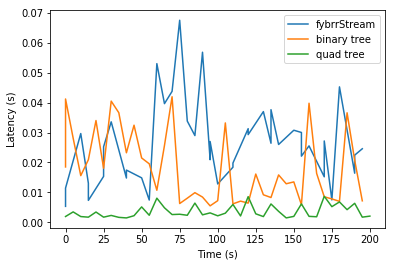

In [38]:
lat1 = df_normal['Latency'][:41]
t1 = df_normal['Time'][:41]
lat2 = df_binary['Latency']
t2 = df_binary['Time']
lat3 = df_quad['Latency'][:41]
t3 = df_quad['Time'][:41]
plt.plot(t1, lat1, label='fybrrStream')
plt.plot(t2, lat2, label='binary tree')
plt.plot(t3, lat3, label='quad tree')
plt.xlabel('Time (s)')
plt.ylabel('Latency (s)')
plt.legend()
plt.savefig('multi-line.png')
plt.savefig('multi-line.pdf')
plt.show()